In [22]:
import requests
import json

import rioxarray as rxr
import numpy as np
import rasterio as rio


ela rchivo tif es menos pesado que guardar la informacion como array, entonces crear una porpia database con las alutars no sera lo mas conveniente. 

In [35]:
import matplotlib.pyplot as plt
import earthpy.plot as ep
import seaborn as sns


In [4]:
street='A. Verbouwelaan'
number='15'
post='8670'
polygone=[]

In [7]:
def house_info(street, number, post):
    a=requests.get('https://api.basisregisters.dev-vlaanderen.be/v1/adressen?'+'straatnaam='+street+'&huisnummer='+number+'&postcode='+post+'&limit=1')
    b=a.json()
    id1= b['adressen'][0]['identificator']['objectId']
    print('Address found: Id1 is',id1)
    c=requests.get('https://api.basisregisters.vlaanderen.be/v1/gebouweenheden?adresObjectId='+id1)
    d=c.json()
    id2= d['gebouweenheden'][0]['identificator']['objectId']
    print('Building units found: Id2 is',id2)
    e=requests.get('https://api.basisregisters.vlaanderen.be/v1/gebouweenheden/'+id2)
    f=e.json()
    id3= f['gebouw']['objectId']
    print('Building found: Id3 is',id3)
    g=requests.get('https://api.basisregisters.vlaanderen.be/v1/gebouwen/'+id3)
    h=g.json()
    poly=h['geometriePolygoon']['polygon']['coordinates'][0]
    polygone.append(poly)

In [8]:
house_info(street, number, post)

Address found: Id1 is 20074984
Building units found: Id2 is 20074995
Building found: Id3 is 16145178


In [71]:
geometries = [
    {
        'type': 'Polygon',
        'coordinates': polygone
    }
]

In [72]:
x=polygone[0][0][0]
y=polygone[0][0][1]


In [73]:
read_dsm = rxr.open_rasterio('DHMVIIDSMRAS1m_k11.tif')
read_dtm = rxr.open_rasterio('DHMVIIDTMRAS1m_k11.tif')

In [94]:
data=np.load('dsm_11.npy')

In [89]:
coor=read_dsm.coords
dim=read_dsm.dims
at=read_dsm.attrs


In [97]:
dif=read_dsm-read_dtm

In [104]:
dif

<xarray.DataArray (band: 1, y: 8500, x: 15500)>
array([[[0.        , 0.        , 0.        , ..., 0.13500854,
         0.14500427, 0.18000004],
        [0.        , 0.        , 0.        , ..., 0.19500855,
         0.1150043 , 0.18000004],
        [0.        , 0.        , 0.        , ..., 0.20500857,
         0.2450043 , 0.20000002],
        ...,
        [1.83      , 3.3000002 , 1.86      , ..., 0.        ,
         0.        , 0.        ],
        [1.3599557 , 1.1999553 , 2.5199552 , ..., 0.        ,
         0.        , 0.        ],
        [0.51      , 3.9699998 , 3.25      , ..., 0.        ,
         0.        , 0.        ]]], dtype=float32)
Coordinates:
  * band         (band) int32 1
  * y            (y) float64 2.065e+05 2.065e+05 2.065e+05 ... 1.98e+05 1.98e+05
  * x            (x) float64 1.85e+04 1.85e+04 1.85e+04 ... 3.4e+04 3.4e+04
    spatial_ref  int32 0

In [98]:
np.save('dif.npy', dif)

In [78]:
a=read_dsm.rio.clip(geometries)
b=read_dtm.rio.clip(geometries)
d=a-b


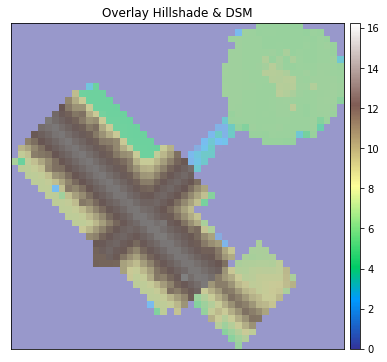

In [79]:
fig, ax = plt.subplots(figsize=(10, 6))
ep.plot_bands(
    d[0], ax=ax, cmap="terrain", title="Overlay Hillshade & DSM",
)
ax.imshow(d[0], cmap="Greys", alpha=0.5)
plt.show()


In [81]:
type(d)

xarray.core.dataarray.DataArray